In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 16

In [2]:
df = pd.read_csv("KGQA Leaderboard - Visualization.csv")
df = df[df.System != 'mBERT']

In [3]:
datasets = ['QALD-8', 'QALD-9', 'LC-QuAD 1.0', 'LC-QuAD 2.0']

# Violin plot

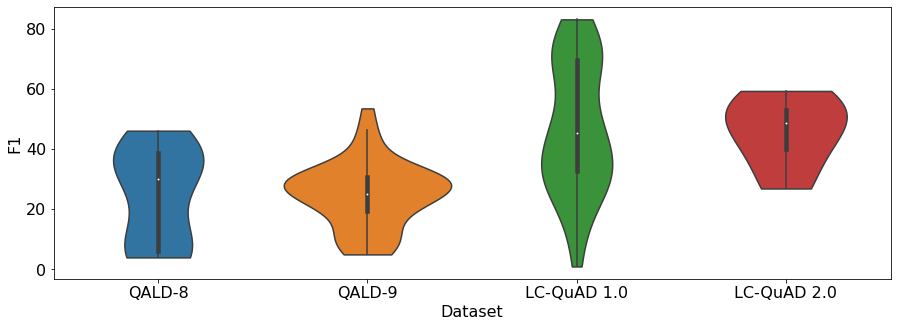

In [5]:
df_ = df[df.Dataset.isin(datasets)]
sns.violinplot(x="Dataset", y="F1", data=df_, cut=0)
plt.savefig('img/violin.jpg')

# Bar Charts

/tmp/ipykernel_6772/153006320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.sort_values('F1', inplace=True, ascending=False)


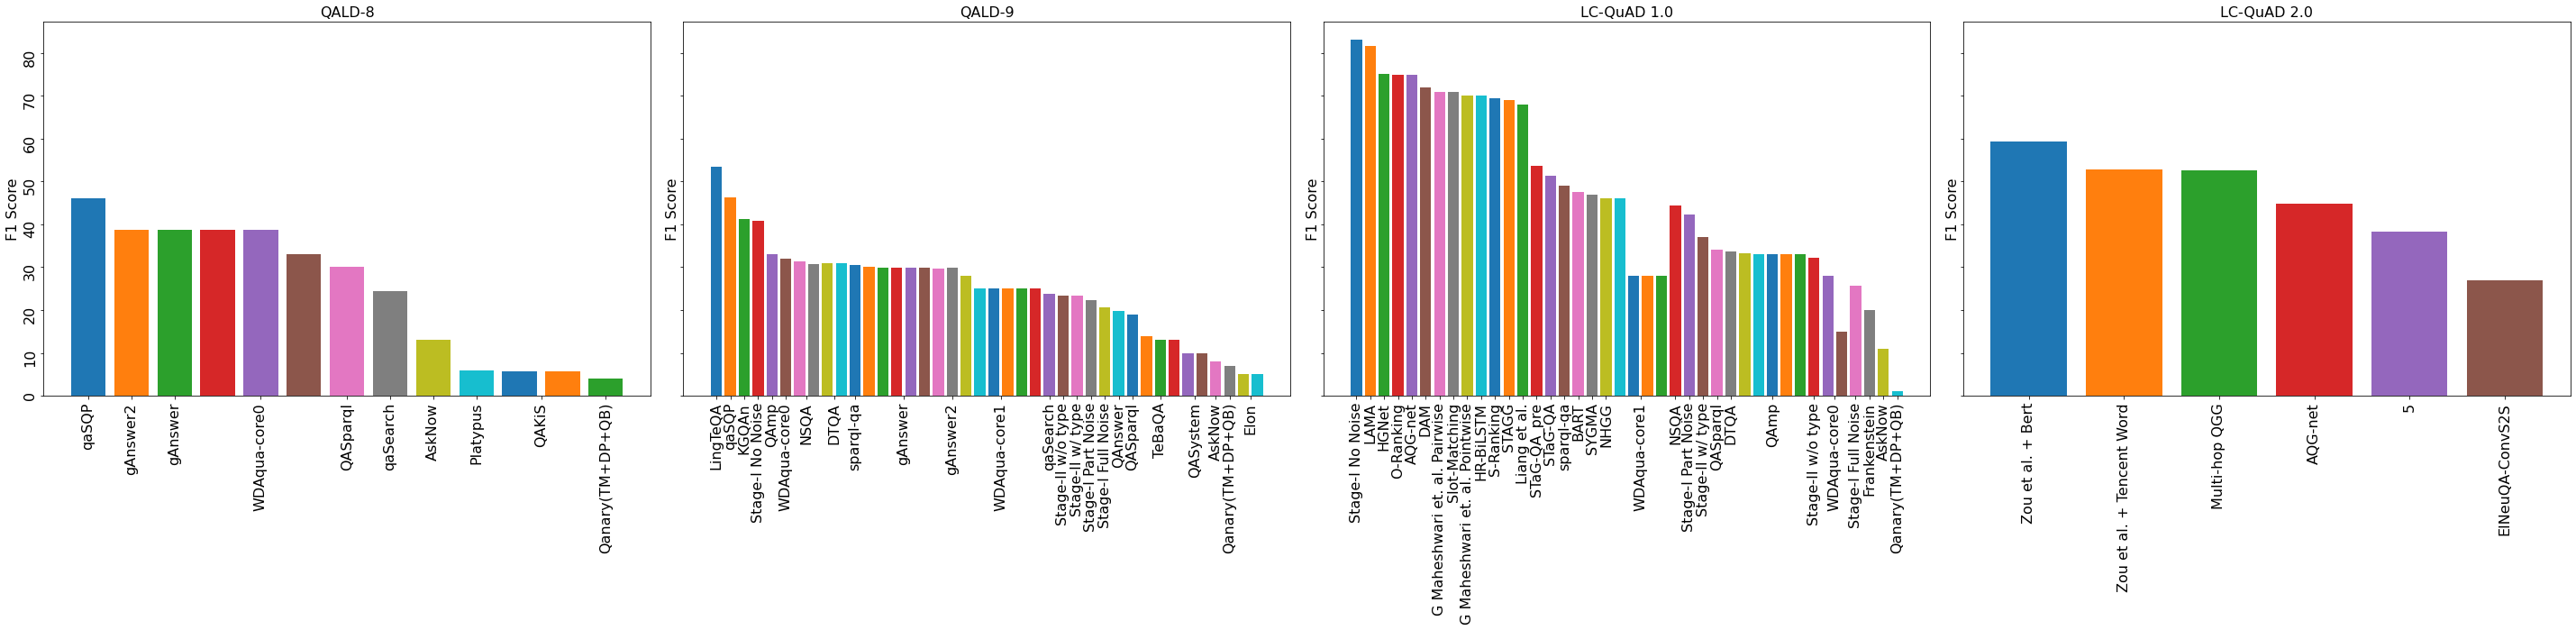

In [6]:
fig, ax = plt.subplots(1,4, figsize=(40, 10), sharey=True)
rcParams['font.size'] = 16

for i in range(len(datasets)):
    df_ = df[df.Dataset == datasets[i]]
    df_.sort_values('F1', inplace=True, ascending=False)
    ax[i].set_title(datasets[i], fontsize=16)
    x = [k for k in range(df_.shape[0])]
    labels = []
    k = 0
    for system in df_.System.unique():
        F1_system = df_[df_.System == system].F1
        for j in range(len(F1_system.values)):
            ax[i].bar(x[k], F1_system.values[j], label=system)
            ax[i].tick_params(labelrotation=90)
            labels.append(system)
            k += 1
    lbl_df = pd.DataFrame.from_dict({"x": x, "labels": labels}).groupby('labels').mean().reset_index()
    ax[i].set_xticks(lbl_df.x)
    ax[i].set_ylabel("F1 Score")
    ax[i].set_xticklabels(lbl_df['labels'])

plt.tight_layout()
plt.savefig('img/barcharts.jpg')

# F1 vs Time

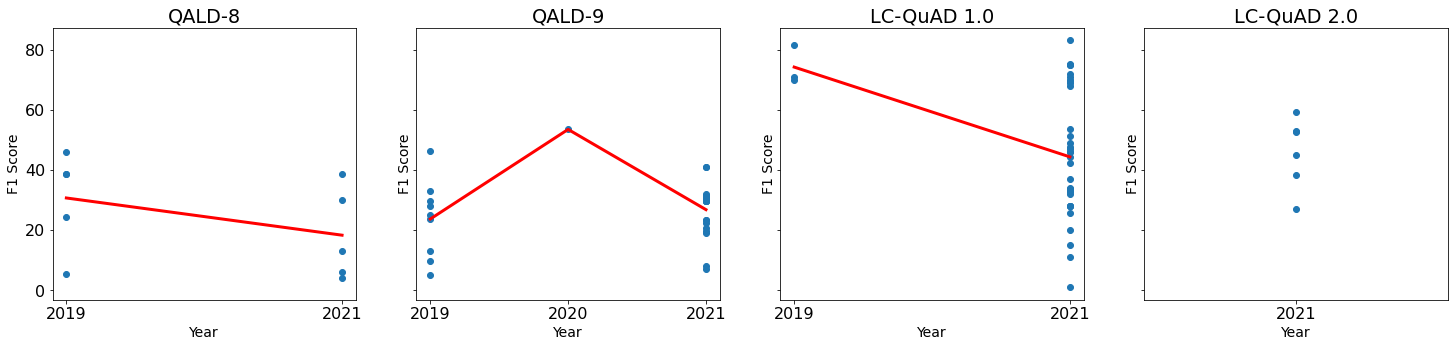

In [7]:
# multiple datasets
fig, ax = plt.subplots(1, 4, figsize=(25, 5), sharey=True)

for i in range(len(datasets)):
    df_ = df[df.Dataset == datasets[i]]
    df_ = pd.merge(df_, df_.groupby(['System'])['Year'].min().reset_index(), on=["System", "Year"])
    ax[i].scatter(df_.Year, df_.F1)
    ax[i].plot(
            sorted(df_.Year.unique()),
            [df_[df_.Year == yr].F1.mean() for yr in sorted(df_.Year.unique())],
            color='red',
            linewidth=3
        )
    ax[i].set_ylabel('F1 Score', fontsize=14)
    ax[i].set_xlabel('Year', fontsize=14)
    ax[i].set_xticks(sorted(df_.Year.unique()))
    ax[i].set_title(datasets[i])

plt.savefig('img/f1-vs-time.jpg')

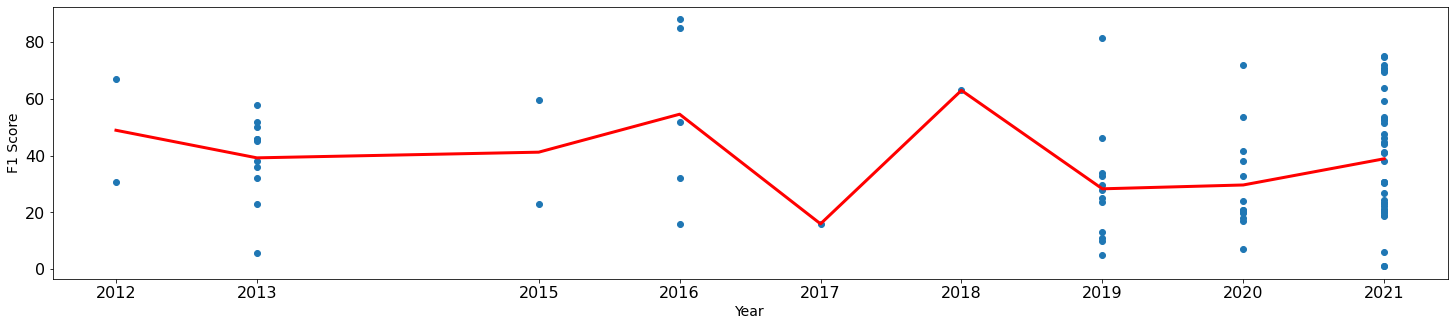

In [8]:
fig, ax = plt.subplots(1, figsize=(25, 5))

df_ = df.groupby(['System'])['F1', 'Year'].min().reset_index()
ax.scatter(df_.Year, df_.F1)
ax.plot(
        sorted(df_.Year.unique()),
        [df_[df_.Year == yr].F1.mean() for yr in sorted(df_.Year.unique())],
        color='red',
        linewidth=3
    )
ax.set_ylabel('F1 Score', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_xticks(sorted(df_.Year.unique()))

plt.savefig('img/f1-vs-time.jpg')

In [9]:
# df.join(df.groupby(['System'])['Year'].min().reset_index(), on=["System", "Year"], rsuffix="_right")

pd.merge(df, df.groupby(['System'])['Year'].min().reset_index(), on=["System", "Year"])

,Dataset,System,Link,Year,F1
0,QALD-1,QASparql,https://arxiv.org/pdf/2105.00811.pdf,2021,1.00
1,QALD-2,QASparql,https://arxiv.org/pdf/2105.00811.pdf,2021,1.00
2,QALD-3,QASparql,https://arxiv.org/pdf/2105.00811.pdf,2021,6.00
3,QALD-4,QASparql,https://arxiv.org/pdf/2105.00811.pdf,2021,8.00
4,QALD-5,QASparql,https://arxiv.org/pdf/2105.00811.pdf,2021,12.00
...,...,...,...,...,...
125,LC-QuAD 2.0,ElNeuQA-ConvS2S,https://arxiv.org/pdf/2107.02865.pdf,2021,26.90
126,LC-QuAD 2.0,Multi-hop QGG,https://arxiv.org/pdf/2111.06086.pdf,2021,52.60
127,LC-QuAD 2.0,Zou et al. + Tencent Word,https://arxiv.org/pdf/2111.06086.pdf,2021,52.90
128,LC-QuAD 2.0,Zou et al. + Bert,https://arxiv.org/pdf/2111.06086.pdf,2021,59.30


# Disribution

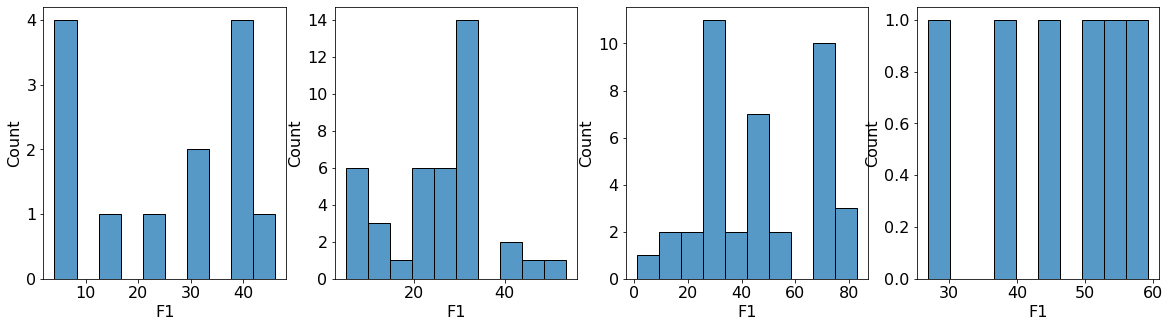

In [10]:
fig, ax = plt.subplots(1,4, figsize=(20, 5))
for i in range(len(datasets)):
    sns.histplot(df[df.Dataset == datasets[i]].F1, bins=10, label=datasets[i], ax=ax[i])
    
plt.savefig('img/distribution-separate.jpg')

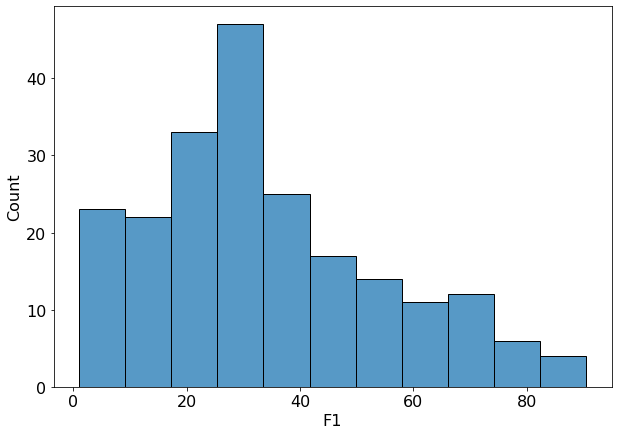

In [11]:
fig, ax = plt.subplots(1, figsize=(10, 7))
sns.histplot(df.F1, label=datasets[i], ax=ax)
plt.savefig('img/distribution-common.jpg')

<AxesSubplot:xlabel='Type', ylabel='F1'>

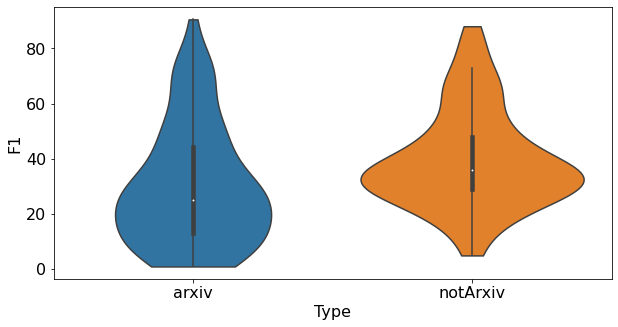

In [93]:
fig, ax = plt.subplots(1, figsize=(10, 5), sharey=True)


df_ = pd.DataFrame.from_dict({
        'Type': ['arxiv']*len(df.dropna()[df.dropna().Link.str.contains('arxiv')].F1.values.tolist()) + ['notArxiv']*len(df.dropna()[~df.dropna().Link.str.contains('arxiv')].F1.values.tolist()),
        'F1': df.dropna()[df.dropna().Link.str.contains('arxiv')].F1.values.tolist() + df.dropna()[~df.dropna().Link.str.contains('arxiv')].F1.values.tolist()
    })

sns.violinplot(x="Type", y="F1", data=df_, cut=0)

In [12]:
df.dropna()[df.dropna().Link.str.contains('arxiv')].F1.mean(), df.dropna()[~df.dropna().Link.str.contains('arxiv')].F1.mean()

(30.20833333333333, 39.5110101010101)

In [13]:
df.dropna()[df.dropna().Link.str.contains('arxiv')].shape, df.dropna()[~df.dropna().Link.str.contains('arxiv')].shape

((114, 5), (99, 5))

In [14]:
114/213, 99/213

(0.5352112676056338, 0.4647887323943662)

# Outliers/Errors

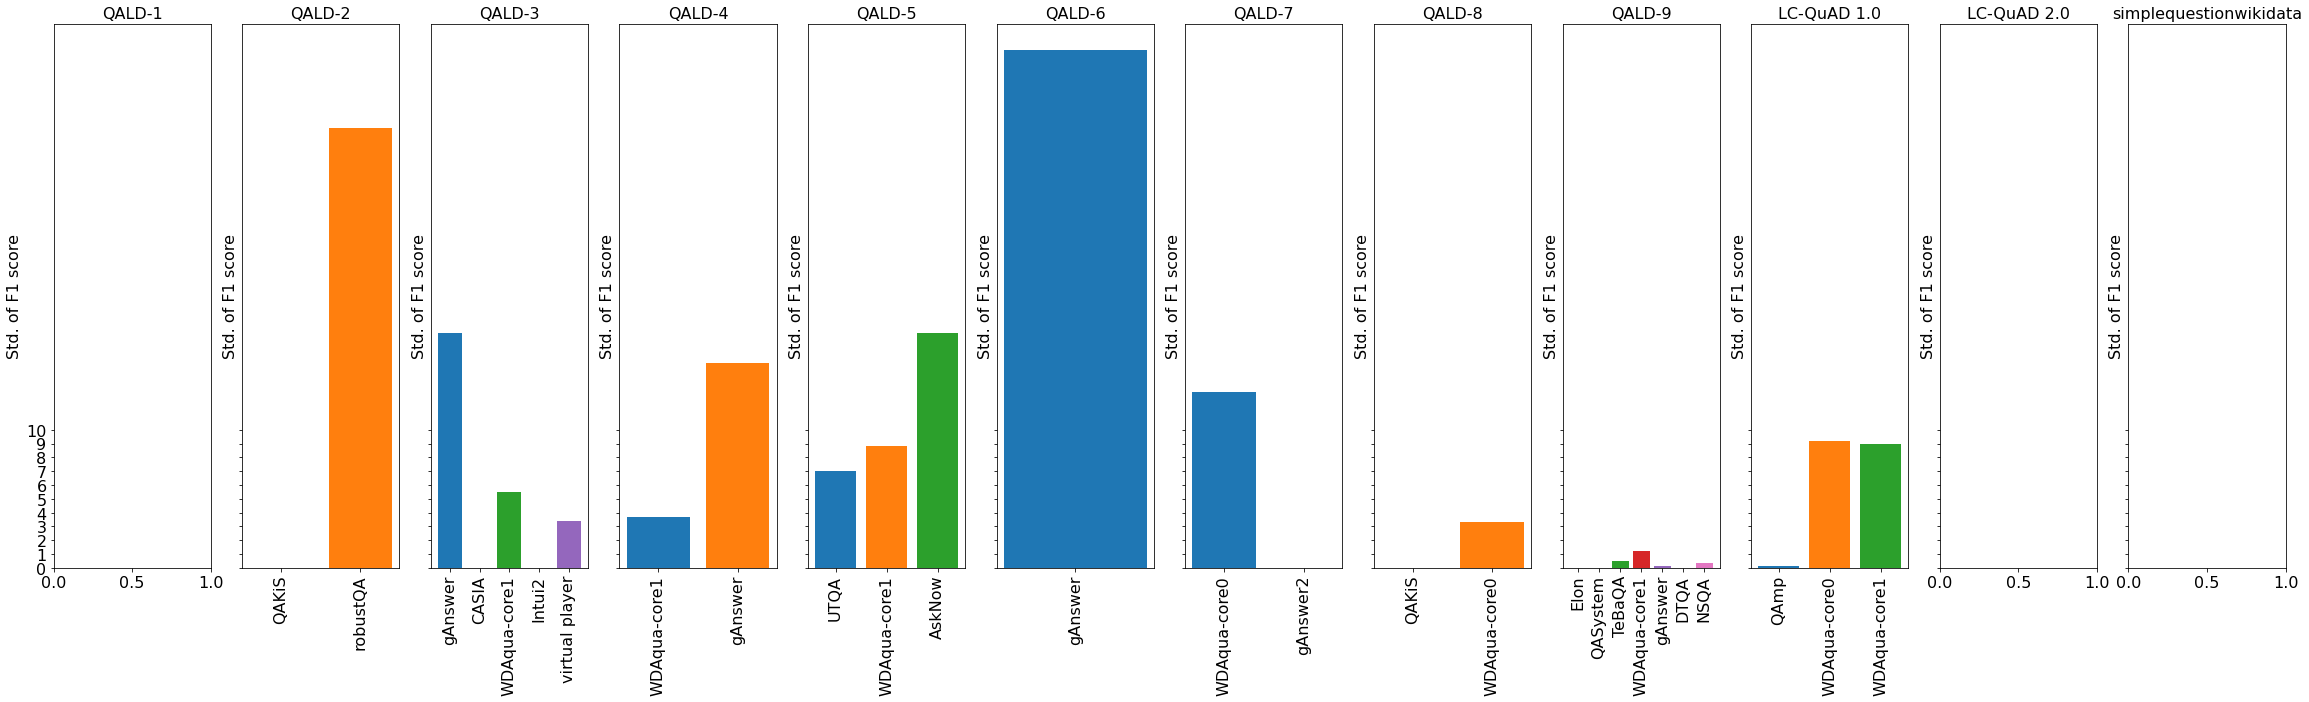

In [15]:
dss = df.Dataset.unique()
fig, ax = plt.subplots(1,len(dss), figsize=(40, 10), sharey=True)
dfs = list()

for j in range(len(dss)):
    systems_dict = dict()
    for i, row in df.iterrows():
        df_ = df[(df.System == row.System) & (df.Dataset == row.Dataset) & (df.Dataset == dss[j])]
        if df_.shape[0] > 1:
            dfs.append(df_)
            systems_dict[row.System] = df_.F1.std()
            
    ax[j].set_title(dss[j], fontsize=16)
    ax[j].set_ylabel("Std. of F1 score")
    ax[j].set_yticks([0,1,2,3,4,5,6,7,8,9,10])
    for k, v in systems_dict.items():
        ax[j].bar(k, v, label=system)
        ax[j].tick_params(labelrotation=90)

In [16]:
for d in dfs:
    display(d)
    print("----------")

,Dataset,System,Link,Year,F1
13,QALD-2,QAKiS,https://www.sciencedirect.com/science/article/...,2013,38.0
14,QALD-2,QAKiS,https://hal.inria.fr/hal-01171115/,2013,38.0


----------


,Dataset,System,Link,Year,F1
13,QALD-2,QAKiS,https://www.sciencedirect.com/science/article/...,2013,38.0
14,QALD-2,QAKiS,https://hal.inria.fr/hal-01171115/,2013,38.0


----------


,Dataset,System,Link,Year,F1
20,QALD-2,robustQA,https://dl.acm.org/doi/abs/10.1145/2505515.250...,2013,23.0
21,QALD-2,robustQA,https://dl.acm.org/doi/abs/10.1145/2505515.250...,2013,68.0


----------


,Dataset,System,Link,Year,F1
20,QALD-2,robustQA,https://dl.acm.org/doi/abs/10.1145/2505515.250...,2013,23.0
21,QALD-2,robustQA,https://dl.acm.org/doi/abs/10.1145/2505515.250...,2013,68.0


----------


,Dataset,System,Link,Year,F1
23,QALD-3,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,16.0
31,QALD-3,gAnswer,http://www.semantic-web-journal.net/system/fil...,2020,40.0


----------


,Dataset,System,Link,Year,F1
27,QALD-3,CASIA,http://www.nlpr.ia.ac.cn/cip/shizhuhe/articles...,2013,36.0
42,QALD-3,CASIA,http://nlpr-web.ia.ac.cn/cip/~liukang/liukangP...,2013,36.0


----------


,Dataset,System,Link,Year,F1
28,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,51.0
29,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,42.0
30,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,41.0
32,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,38.0
33,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,37.0
34,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,36.0


----------


,Dataset,System,Link,Year,F1
28,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,51.0
29,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,42.0
30,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,41.0
32,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,38.0
33,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,37.0
34,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,36.0


----------


,Dataset,System,Link,Year,F1
28,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,51.0
29,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,42.0
30,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,41.0
32,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,38.0
33,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,37.0
34,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,36.0


----------


,Dataset,System,Link,Year,F1
23,QALD-3,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,16.0
31,QALD-3,gAnswer,http://www.semantic-web-journal.net/system/fil...,2020,40.0


----------


,Dataset,System,Link,Year,F1
28,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,51.0
29,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,42.0
30,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,41.0
32,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,38.0
33,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,37.0
34,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,36.0


----------


,Dataset,System,Link,Year,F1
28,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,51.0
29,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,42.0
30,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,41.0
32,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,38.0
33,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,37.0
34,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,36.0


----------


,Dataset,System,Link,Year,F1
28,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,51.0
29,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,42.0
30,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,41.0
32,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,38.0
33,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,37.0
34,QALD-3,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,36.0


----------


,Dataset,System,Link,Year,F1
36,QALD-3,Intui2,http://www.semantic-web-journal.net/system/fil...,2020,32.0
41,QALD-3,Intui2,https://citeseerx.ist.psu.edu/viewdoc/download...,2013,32.0


----------


,Dataset,System,Link,Year,F1
36,QALD-3,Intui2,http://www.semantic-web-journal.net/system/fil...,2020,32.0
41,QALD-3,Intui2,https://citeseerx.ist.psu.edu/viewdoc/download...,2013,32.0


----------


,Dataset,System,Link,Year,F1
27,QALD-3,CASIA,http://www.nlpr.ia.ac.cn/cip/shizhuhe/articles...,2013,36.0
42,QALD-3,CASIA,http://nlpr-web.ia.ac.cn/cip/~liukang/liukangP...,2013,36.0


----------


,Dataset,System,Link,Year,F1
43,QALD-3,virtual player,https://reader.elsevier.com/reader/sd/pii/S000...,2015,64.29
44,QALD-3,virtual player,https://reader.elsevier.com/reader/sd/pii/S000...,2015,59.47


----------


,Dataset,System,Link,Year,F1
43,QALD-3,virtual player,https://reader.elsevier.com/reader/sd/pii/S000...,2015,64.29
44,QALD-3,virtual player,https://reader.elsevier.com/reader/sd/pii/S000...,2015,59.47


----------


,Dataset,System,Link,Year,F1
46,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,39.0
49,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
50,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
51,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
52,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,29.0


----------


,Dataset,System,Link,Year,F1
47,QALD-4,gAnswer,http://www.semantic-web-journal.net/system/fil...,2020,37.0
57,QALD-4,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,16.0


----------


,Dataset,System,Link,Year,F1
46,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,39.0
49,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
50,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
51,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
52,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,29.0


----------


,Dataset,System,Link,Year,F1
46,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,39.0
49,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
50,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
51,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
52,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,29.0


----------


,Dataset,System,Link,Year,F1
46,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,39.0
49,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
50,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
51,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
52,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,29.0


----------


,Dataset,System,Link,Year,F1
46,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,39.0
49,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
50,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
51,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,32.0
52,QALD-4,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,29.0


----------


,Dataset,System,Link,Year,F1
47,QALD-4,gAnswer,http://www.semantic-web-journal.net/system/fil...,2020,37.0
57,QALD-4,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,16.0


----------


,Dataset,System,Link,Year,F1
66,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,65.0
67,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,54.0
68,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,52.0
83,QALD-5,UTQA,https://aclanthology.org/W16-1403.pdf,2016,65.2


----------


,Dataset,System,Link,Year,F1
66,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,65.0
67,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,54.0
68,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,52.0
83,QALD-5,UTQA,https://aclanthology.org/W16-1403.pdf,2016,65.2


----------


,Dataset,System,Link,Year,F1
66,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,65.0
67,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,54.0
68,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,52.0
83,QALD-5,UTQA,https://aclanthology.org/W16-1403.pdf,2016,65.2


----------


,Dataset,System,Link,Year,F1
69,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,47.0
72,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,28.0
73,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,28.0
74,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,30.0
75,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,25.0


----------


,Dataset,System,Link,Year,F1
70,QALD-5,AskNow,http://www.semantic-web-journal.net/system/fil...,2020,33.0
82,QALD-5,AskNow,https://arxiv.org/pdf/2105.00811.pdf,2021,9.0


----------


,Dataset,System,Link,Year,F1
69,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,47.0
72,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,28.0
73,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,28.0
74,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,30.0
75,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,25.0


----------


,Dataset,System,Link,Year,F1
69,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,47.0
72,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,28.0
73,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,28.0
74,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,30.0
75,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,25.0


----------


,Dataset,System,Link,Year,F1
69,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,47.0
72,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,28.0
73,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,28.0
74,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,30.0
75,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,25.0


----------


,Dataset,System,Link,Year,F1
69,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,47.0
72,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,28.0
73,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,28.0
74,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,30.0
75,QALD-5,WDAqua-core1,http://www.semantic-web-journal.net/system/fil...,2020,25.0


----------


,Dataset,System,Link,Year,F1
70,QALD-5,AskNow,http://www.semantic-web-journal.net/system/fil...,2020,33.0
82,QALD-5,AskNow,https://arxiv.org/pdf/2105.00811.pdf,2021,9.0


----------


,Dataset,System,Link,Year,F1
66,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,65.0
67,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,54.0
68,QALD-5,UTQA,http://www.semantic-web-journal.net/system/fil...,2020,52.0
83,QALD-5,UTQA,https://aclanthology.org/W16-1403.pdf,2016,65.2


----------


,Dataset,System,Link,Year,F1
85,QALD-6,gAnswer,https://ieeexplore.ieee.org/document/8085196,2017,78.0
87,QALD-6,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,25.0


----------


,Dataset,System,Link,Year,F1
85,QALD-6,gAnswer,https://ieeexplore.ieee.org/document/8085196,2017,78.0
87,QALD-6,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,25.0


----------


,Dataset,System,Link,Year,F1
93,QALD-7,WDAqua-core0,https://arxiv.org/pdf/2004.13843.pdf,2020,51.0
97,QALD-7,WDAqua-core0,https://assets.researchsquare.com/files/rs-707...,2021,51.1
106,QALD-7,WDAqua-core0,https://arxiv.org/pdf/2105.00811.pdf,2021,29.0


----------


,Dataset,System,Link,Year,F1
94,QALD-7,gAnswer2,https://arxiv.org/pdf/2004.13843.pdf,2020,55.6
98,QALD-7,gAnswer2,https://assets.researchsquare.com/files/rs-707...,2021,55.6


----------


,Dataset,System,Link,Year,F1
93,QALD-7,WDAqua-core0,https://arxiv.org/pdf/2004.13843.pdf,2020,51.0
97,QALD-7,WDAqua-core0,https://assets.researchsquare.com/files/rs-707...,2021,51.1
106,QALD-7,WDAqua-core0,https://arxiv.org/pdf/2105.00811.pdf,2021,29.0


----------


,Dataset,System,Link,Year,F1
94,QALD-7,gAnswer2,https://arxiv.org/pdf/2004.13843.pdf,2020,55.6
98,QALD-7,gAnswer2,https://assets.researchsquare.com/files/rs-707...,2021,55.6


----------


,Dataset,System,Link,Year,F1
93,QALD-7,WDAqua-core0,https://arxiv.org/pdf/2004.13843.pdf,2020,51.0
97,QALD-7,WDAqua-core0,https://assets.researchsquare.com/files/rs-707...,2021,51.1
106,QALD-7,WDAqua-core0,https://arxiv.org/pdf/2105.00811.pdf,2021,29.0


----------


,Dataset,System,Link,Year,F1
114,QALD-8,QAKiS,https://arxiv.org/pdf/1910.09760.pdf,2019,5.60
122,QALD-8,QAKiS,https://link.springer.com/article/10.1007/s137...,2021,5.63


----------


,Dataset,System,Link,Year,F1
115,QALD-8,WDAqua-core0,https://arxiv.org/pdf/1910.09760.pdf,2019,38.70
117,QALD-8,WDAqua-core0,https://arxiv.org/pdf/2105.00811.pdf,2021,33.00
124,QALD-8,WDAqua-core0,https://link.springer.com/article/10.1007/s137...,2021,38.72


----------


,Dataset,System,Link,Year,F1
115,QALD-8,WDAqua-core0,https://arxiv.org/pdf/1910.09760.pdf,2019,38.70
117,QALD-8,WDAqua-core0,https://arxiv.org/pdf/2105.00811.pdf,2021,33.00
124,QALD-8,WDAqua-core0,https://link.springer.com/article/10.1007/s137...,2021,38.72


----------


,Dataset,System,Link,Year,F1
114,QALD-8,QAKiS,https://arxiv.org/pdf/1910.09760.pdf,2019,5.60
122,QALD-8,QAKiS,https://link.springer.com/article/10.1007/s137...,2021,5.63


----------


,Dataset,System,Link,Year,F1
115,QALD-8,WDAqua-core0,https://arxiv.org/pdf/1910.09760.pdf,2019,38.70
117,QALD-8,WDAqua-core0,https://arxiv.org/pdf/2105.00811.pdf,2021,33.00
124,QALD-8,WDAqua-core0,https://link.springer.com/article/10.1007/s137...,2021,38.72


----------


,Dataset,System,Link,Year,F1
125,QALD-9,Elon,https://arxiv.org/pdf/1910.09760.pdf,2019,5.0
142,QALD-9,Elon,https://link.springer.com/article/10.1007/s137...,2021,5.0


----------


,Dataset,System,Link,Year,F1
126,QALD-9,QASystem,https://arxiv.org/pdf/1910.09760.pdf,2019,9.8
143,QALD-9,QASystem,https://link.springer.com/article/10.1007/s137...,2021,9.8


----------


,Dataset,System,Link,Year,F1
127,QALD-9,TeBaQA,https://arxiv.org/pdf/1910.09760.pdf,2019,13.0
144,QALD-9,TeBaQA,NaN,2021,13.0
164,QALD-9,TeBaQA,http://www.semantic-web-journal.net/system/fil...,2021,13.9


----------


,Dataset,System,Link,Year,F1
128,QALD-9,WDAqua-core1,https://arxiv.org/pdf/1910.09760.pdf,2019,25.00
132,QALD-9,WDAqua-core1,https://dl.acm.org/doi/pdf/10.1145/3357384.335...,2019,28.00
139,QALD-9,WDAqua-core1,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,24.99
145,QALD-9,WDAqua-core1,https://link.springer.com/article/10.1007/s137...,2021,25.00
147,QALD-9,WDAqua-core1,https://arxiv.org/pdf/2109.09475.pdf,2021,25.00
154,QALD-9,WDAqua-core1,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,24.99


----------


,Dataset,System,Link,Year,F1
128,QALD-9,WDAqua-core1,https://arxiv.org/pdf/1910.09760.pdf,2019,25.00
132,QALD-9,WDAqua-core1,https://dl.acm.org/doi/pdf/10.1145/3357384.335...,2019,28.00
139,QALD-9,WDAqua-core1,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,24.99
145,QALD-9,WDAqua-core1,https://link.springer.com/article/10.1007/s137...,2021,25.00
147,QALD-9,WDAqua-core1,https://arxiv.org/pdf/2109.09475.pdf,2021,25.00
154,QALD-9,WDAqua-core1,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,24.99


----------


,Dataset,System,Link,Year,F1
135,QALD-9,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,30.00
140,QALD-9,gAnswer,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,29.81
146,QALD-9,gAnswer,https://link.springer.com/article/10.1007/s137...,2021,29.80
148,QALD-9,gAnswer,https://arxiv.org/pdf/2109.09475.pdf,2021,29.80
155,QALD-9,gAnswer,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,29.81
162,QALD-9,gAnswer,http://www.semantic-web-journal.net/system/fil...,2021,29.60


----------


,Dataset,System,Link,Year,F1
128,QALD-9,WDAqua-core1,https://arxiv.org/pdf/1910.09760.pdf,2019,25.00
132,QALD-9,WDAqua-core1,https://dl.acm.org/doi/pdf/10.1145/3357384.335...,2019,28.00
139,QALD-9,WDAqua-core1,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,24.99
145,QALD-9,WDAqua-core1,https://link.springer.com/article/10.1007/s137...,2021,25.00
147,QALD-9,WDAqua-core1,https://arxiv.org/pdf/2109.09475.pdf,2021,25.00
154,QALD-9,WDAqua-core1,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,24.99


----------


,Dataset,System,Link,Year,F1
135,QALD-9,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,30.00
140,QALD-9,gAnswer,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,29.81
146,QALD-9,gAnswer,https://link.springer.com/article/10.1007/s137...,2021,29.80
148,QALD-9,gAnswer,https://arxiv.org/pdf/2109.09475.pdf,2021,29.80
155,QALD-9,gAnswer,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,29.81
162,QALD-9,gAnswer,http://www.semantic-web-journal.net/system/fil...,2021,29.60


----------


,Dataset,System,Link,Year,F1
141,QALD-9,DTQA,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,30.88
156,QALD-9,DTQA,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,30.88


----------


,Dataset,System,Link,Year,F1
125,QALD-9,Elon,https://arxiv.org/pdf/1910.09760.pdf,2019,5.0
142,QALD-9,Elon,https://link.springer.com/article/10.1007/s137...,2021,5.0


----------


,Dataset,System,Link,Year,F1
126,QALD-9,QASystem,https://arxiv.org/pdf/1910.09760.pdf,2019,9.8
143,QALD-9,QASystem,https://link.springer.com/article/10.1007/s137...,2021,9.8


----------


,Dataset,System,Link,Year,F1
127,QALD-9,TeBaQA,https://arxiv.org/pdf/1910.09760.pdf,2019,13.0
144,QALD-9,TeBaQA,NaN,2021,13.0
164,QALD-9,TeBaQA,http://www.semantic-web-journal.net/system/fil...,2021,13.9


----------


,Dataset,System,Link,Year,F1
128,QALD-9,WDAqua-core1,https://arxiv.org/pdf/1910.09760.pdf,2019,25.00
132,QALD-9,WDAqua-core1,https://dl.acm.org/doi/pdf/10.1145/3357384.335...,2019,28.00
139,QALD-9,WDAqua-core1,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,24.99
145,QALD-9,WDAqua-core1,https://link.springer.com/article/10.1007/s137...,2021,25.00
147,QALD-9,WDAqua-core1,https://arxiv.org/pdf/2109.09475.pdf,2021,25.00
154,QALD-9,WDAqua-core1,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,24.99


----------


,Dataset,System,Link,Year,F1
135,QALD-9,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,30.00
140,QALD-9,gAnswer,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,29.81
146,QALD-9,gAnswer,https://link.springer.com/article/10.1007/s137...,2021,29.80
148,QALD-9,gAnswer,https://arxiv.org/pdf/2109.09475.pdf,2021,29.80
155,QALD-9,gAnswer,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,29.81
162,QALD-9,gAnswer,http://www.semantic-web-journal.net/system/fil...,2021,29.60


----------


,Dataset,System,Link,Year,F1
128,QALD-9,WDAqua-core1,https://arxiv.org/pdf/1910.09760.pdf,2019,25.00
132,QALD-9,WDAqua-core1,https://dl.acm.org/doi/pdf/10.1145/3357384.335...,2019,28.00
139,QALD-9,WDAqua-core1,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,24.99
145,QALD-9,WDAqua-core1,https://link.springer.com/article/10.1007/s137...,2021,25.00
147,QALD-9,WDAqua-core1,https://arxiv.org/pdf/2109.09475.pdf,2021,25.00
154,QALD-9,WDAqua-core1,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,24.99


----------


,Dataset,System,Link,Year,F1
135,QALD-9,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,30.00
140,QALD-9,gAnswer,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,29.81
146,QALD-9,gAnswer,https://link.springer.com/article/10.1007/s137...,2021,29.80
148,QALD-9,gAnswer,https://arxiv.org/pdf/2109.09475.pdf,2021,29.80
155,QALD-9,gAnswer,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,29.81
162,QALD-9,gAnswer,http://www.semantic-web-journal.net/system/fil...,2021,29.60


----------


,Dataset,System,Link,Year,F1
128,QALD-9,WDAqua-core1,https://arxiv.org/pdf/1910.09760.pdf,2019,25.00
132,QALD-9,WDAqua-core1,https://dl.acm.org/doi/pdf/10.1145/3357384.335...,2019,28.00
139,QALD-9,WDAqua-core1,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,24.99
145,QALD-9,WDAqua-core1,https://link.springer.com/article/10.1007/s137...,2021,25.00
147,QALD-9,WDAqua-core1,https://arxiv.org/pdf/2109.09475.pdf,2021,25.00
154,QALD-9,WDAqua-core1,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,24.99


----------


,Dataset,System,Link,Year,F1
135,QALD-9,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,30.00
140,QALD-9,gAnswer,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,29.81
146,QALD-9,gAnswer,https://link.springer.com/article/10.1007/s137...,2021,29.80
148,QALD-9,gAnswer,https://arxiv.org/pdf/2109.09475.pdf,2021,29.80
155,QALD-9,gAnswer,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,29.81
162,QALD-9,gAnswer,http://www.semantic-web-journal.net/system/fil...,2021,29.60


----------


,Dataset,System,Link,Year,F1
141,QALD-9,DTQA,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,30.88
156,QALD-9,DTQA,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,30.88


----------


,Dataset,System,Link,Year,F1
158,QALD-9,NSQA,https://arxiv.org/pdf/2111.03000.pdf,2021,30.80
159,QALD-9,NSQA,https://aclanthology.org/2021.findings-acl.339...,2021,31.26


----------


,Dataset,System,Link,Year,F1
158,QALD-9,NSQA,https://arxiv.org/pdf/2111.03000.pdf,2021,30.80
159,QALD-9,NSQA,https://aclanthology.org/2021.findings-acl.339...,2021,31.26


----------


,Dataset,System,Link,Year,F1
135,QALD-9,gAnswer,https://arxiv.org/pdf/2105.00811.pdf,2021,30.00
140,QALD-9,gAnswer,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,29.81
146,QALD-9,gAnswer,https://link.springer.com/article/10.1007/s137...,2021,29.80
148,QALD-9,gAnswer,https://arxiv.org/pdf/2109.09475.pdf,2021,29.80
155,QALD-9,gAnswer,http://ceur-ws.org/Vol-2980/paper312.pdf,2021,29.81
162,QALD-9,gAnswer,http://www.semantic-web-journal.net/system/fil...,2021,29.60


----------


,Dataset,System,Link,Year,F1
127,QALD-9,TeBaQA,https://arxiv.org/pdf/1910.09760.pdf,2019,13.0
144,QALD-9,TeBaQA,NaN,2021,13.0
164,QALD-9,TeBaQA,http://www.semantic-web-journal.net/system/fil...,2021,13.9


----------


,Dataset,System,Link,Year,F1
182,LC-QuAD 1.0,QAmp,https://arxiv.org/abs/2111.05825,2021,33.00
192,LC-QuAD 1.0,QAmp,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,33.00
194,LC-QuAD 1.0,QAmp,https://link.springer.com/article/10.1007/s137...,2021,33.00
197,LC-QuAD 1.0,QAmp,https://arxiv.org/pdf/2109.09475.pdf,2021,33.33
221,LC-QuAD 1.0,QAmp,https://aclanthology.org/2021.findings-acl.339...,2021,33.00


----------


,Dataset,System,Link,Year,F1
183,LC-QuAD 1.0,WDAqua-core0,https://arxiv.org/abs/2111.05825,2021,28.0
187,LC-QuAD 1.0,WDAqua-core0,https://arxiv.org/pdf/2105.00811.pdf,2021,15.0


----------


,Dataset,System,Link,Year,F1
184,LC-QuAD 1.0,WDAqua-core1,https://assets.researchsquare.com/files/rs-707...,2021,46.0
191,LC-QuAD 1.0,WDAqua-core1,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,28.0
195,LC-QuAD 1.0,WDAqua-core1,https://link.springer.com/article/10.1007/s137...,2021,28.0
196,LC-QuAD 1.0,WDAqua-core1,https://arxiv.org/pdf/2109.09475.pdf,2021,28.0


----------


,Dataset,System,Link,Year,F1
183,LC-QuAD 1.0,WDAqua-core0,https://arxiv.org/abs/2111.05825,2021,28.0
187,LC-QuAD 1.0,WDAqua-core0,https://arxiv.org/pdf/2105.00811.pdf,2021,15.0


----------


,Dataset,System,Link,Year,F1
184,LC-QuAD 1.0,WDAqua-core1,https://assets.researchsquare.com/files/rs-707...,2021,46.0
191,LC-QuAD 1.0,WDAqua-core1,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,28.0
195,LC-QuAD 1.0,WDAqua-core1,https://link.springer.com/article/10.1007/s137...,2021,28.0
196,LC-QuAD 1.0,WDAqua-core1,https://arxiv.org/pdf/2109.09475.pdf,2021,28.0


----------


,Dataset,System,Link,Year,F1
182,LC-QuAD 1.0,QAmp,https://arxiv.org/abs/2111.05825,2021,33.00
192,LC-QuAD 1.0,QAmp,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,33.00
194,LC-QuAD 1.0,QAmp,https://link.springer.com/article/10.1007/s137...,2021,33.00
197,LC-QuAD 1.0,QAmp,https://arxiv.org/pdf/2109.09475.pdf,2021,33.33
221,LC-QuAD 1.0,QAmp,https://aclanthology.org/2021.findings-acl.339...,2021,33.00


----------


,Dataset,System,Link,Year,F1
182,LC-QuAD 1.0,QAmp,https://arxiv.org/abs/2111.05825,2021,33.00
192,LC-QuAD 1.0,QAmp,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,33.00
194,LC-QuAD 1.0,QAmp,https://link.springer.com/article/10.1007/s137...,2021,33.00
197,LC-QuAD 1.0,QAmp,https://arxiv.org/pdf/2109.09475.pdf,2021,33.33
221,LC-QuAD 1.0,QAmp,https://aclanthology.org/2021.findings-acl.339...,2021,33.00


----------


,Dataset,System,Link,Year,F1
184,LC-QuAD 1.0,WDAqua-core1,https://assets.researchsquare.com/files/rs-707...,2021,46.0
191,LC-QuAD 1.0,WDAqua-core1,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,28.0
195,LC-QuAD 1.0,WDAqua-core1,https://link.springer.com/article/10.1007/s137...,2021,28.0
196,LC-QuAD 1.0,WDAqua-core1,https://arxiv.org/pdf/2109.09475.pdf,2021,28.0


----------


,Dataset,System,Link,Year,F1
184,LC-QuAD 1.0,WDAqua-core1,https://assets.researchsquare.com/files/rs-707...,2021,46.0
191,LC-QuAD 1.0,WDAqua-core1,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,28.0
195,LC-QuAD 1.0,WDAqua-core1,https://link.springer.com/article/10.1007/s137...,2021,28.0
196,LC-QuAD 1.0,WDAqua-core1,https://arxiv.org/pdf/2109.09475.pdf,2021,28.0


----------


,Dataset,System,Link,Year,F1
182,LC-QuAD 1.0,QAmp,https://arxiv.org/abs/2111.05825,2021,33.00
192,LC-QuAD 1.0,QAmp,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,33.00
194,LC-QuAD 1.0,QAmp,https://link.springer.com/article/10.1007/s137...,2021,33.00
197,LC-QuAD 1.0,QAmp,https://arxiv.org/pdf/2109.09475.pdf,2021,33.33
221,LC-QuAD 1.0,QAmp,https://aclanthology.org/2021.findings-acl.339...,2021,33.00


----------


,Dataset,System,Link,Year,F1
182,LC-QuAD 1.0,QAmp,https://arxiv.org/abs/2111.05825,2021,33.00
192,LC-QuAD 1.0,QAmp,https://ojs.aaai.org/index.php/AAAI/article/vi...,2021,33.00
194,LC-QuAD 1.0,QAmp,https://link.springer.com/article/10.1007/s137...,2021,33.00
197,LC-QuAD 1.0,QAmp,https://arxiv.org/pdf/2109.09475.pdf,2021,33.33
221,LC-QuAD 1.0,QAmp,https://aclanthology.org/2021.findings-acl.339...,2021,33.00


----------
